In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("✅ All libraries installed and kernel working")


✅ All libraries installed and kernel working


Load an image and check for any path errors

(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

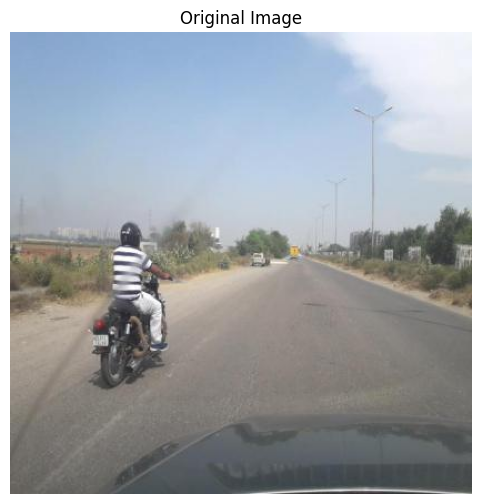

In [20]:
img_path = "../dataset/dataset_split/images/train/"

# pick ONE image name manually and paste here
img = cv2.imread(img_path + "India_000412_jpg.rf.465ece2970778b5d0d141657ea18d458.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")


image loaded successfully

Clahe Function

In [21]:
def apply_clahe(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(
        clipLimit=2.0,
        tileGridSize=(8, 8)
    )
    enhanced = clahe.apply(gray)
    return cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

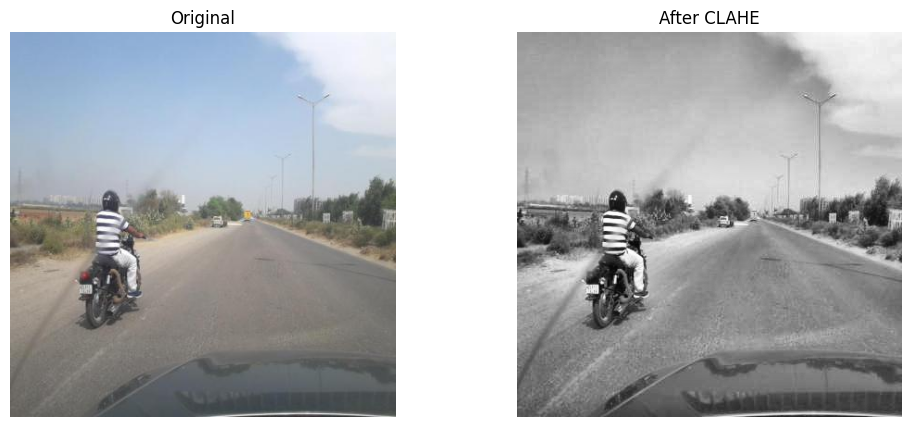

In [22]:
clahe_img = apply_clahe(img)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(clahe_img)
plt.title("After CLAHE")
plt.axis("off")


Working with gamma


In [23]:
def adjust_gamma(image, gamma=1.5):
    inv_gamma = 1.0 / gamma
    table = np.array([
        ((i / 255.0) ** inv_gamma) * 255
        for i in range(256)
    ]).astype("uint8")
    return cv2.LUT(image, table)


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

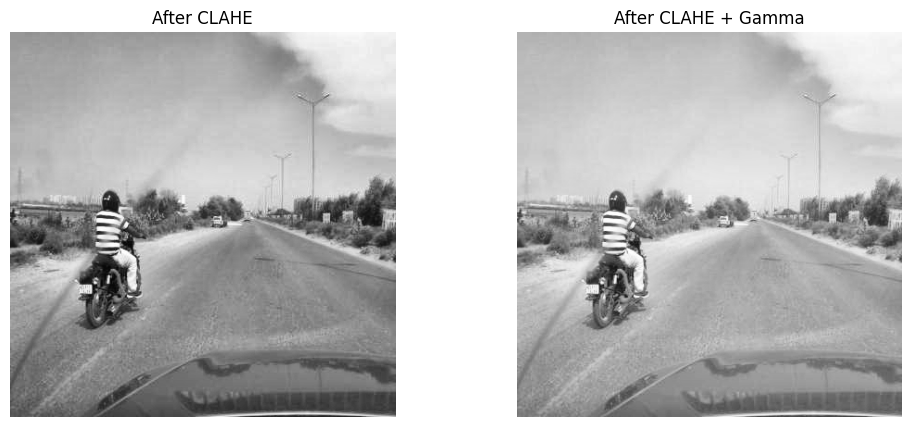

In [24]:
gamma_img = adjust_gamma(clahe_img, gamma=1.5)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(clahe_img)
plt.title("After CLAHE")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gamma_img)
plt.title("After CLAHE + Gamma")
plt.axis("off")


Bilateral filter function

In [29]:
def apply_bilateral(image, d=7, sigmaColor=50, sigmaSpace=75):
    return cv2.bilateralFilter(
        image,
        d=d,
        sigmaColor=sigmaColor,
        sigmaSpace=sigmaSpace
    )


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

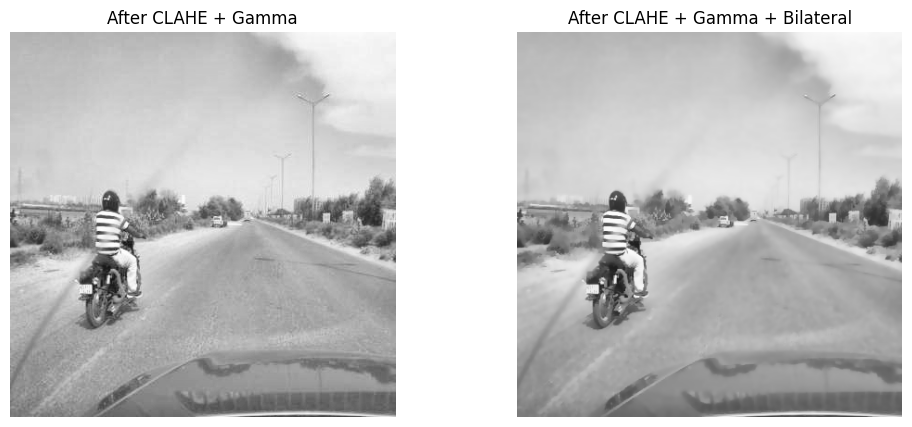

In [30]:
bilateral_img = apply_bilateral(gamma_img)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(gamma_img)
plt.title("After CLAHE + Gamma")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bilateral_img)
plt.title("After CLAHE + Gamma + Bilateral")
plt.axis("off")


Combine everything into ONE function

In [31]:
def preprocess_frame(frame, use_gamma=True, gamma=1.5):
    # CLAHE
    frame = apply_clahe(frame)
    
    # Optional gamma (low-light only)
    if use_gamma:
        frame = adjust_gamma(frame, gamma=gamma)
    
    # Bilateral filtering
    frame = apply_bilateral(frame)
    
    return frame


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

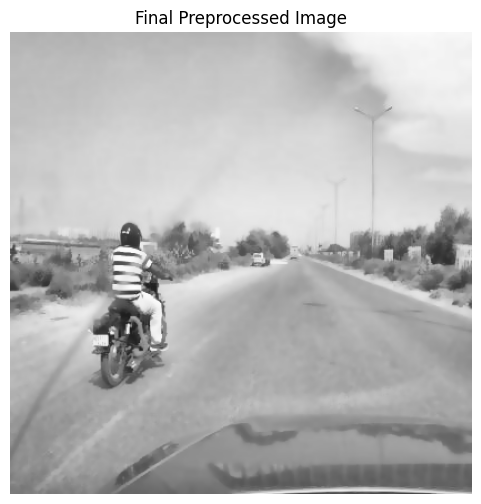

In [32]:
final_img = preprocess_frame(img, use_gamma=True, gamma=1.5)

plt.figure(figsize=(6,6))
plt.imshow(final_img)
plt.title("Final Preprocessed Image")
plt.axis("off")
